# Outliers and sampling

In [1]:
# imports

import os, codecs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Import the dataset
Let us import the Venetian apprenticeship contracts dataset in memory.

In [2]:
df_contracts = pd.read_csv("https://raw.githubusercontent.com/mromanello/ADA-DHOxSS/master/data/apprenticeship_venice/professions_data.csv", sep=";")
df_professions = pd.read_csv("https://raw.githubusercontent.com/mromanello/ADA-DHOxSS/master/data/apprenticeship_venice/professions_classification.csv", sep=",")


Let's take another look to the dataset.

In [3]:
df_contracts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9653 entries, 0 to 9652
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   page_title                9653 non-null   object 
 1   register                  9653 non-null   object 
 2   annual_salary             7870 non-null   float64
 3   a_profession              9653 non-null   object 
 4   profession_code_strict    9618 non-null   object 
 5   profession_code_gen       9614 non-null   object 
 6   profession_cat            9597 non-null   object 
 7   corporation               9350 non-null   object 
 8   keep_profession_a         9653 non-null   int64  
 9   complete_profession_a     9653 non-null   int64  
 10  enrolmentY                9628 non-null   float64
 11  enrolmentM                9631 non-null   float64
 12  startY                    9533 non-null   float64
 13  startM                    9539 non-null   float64
 14  length  

In [4]:
df_contracts.head(5)

,page_title,register,annual_salary,a_profession,profession_code_strict,profession_code_gen,profession_cat,corporation,keep_profession_a,complete_profession_a,...,personal_care_master,clothes_master,generic_expenses_master,salary_in_kind_master,pledge_goods_master,pledge_money_master,salary_master,female_guarantor,period_cat,incremental_salary
0,Carlo Della sosta (Orese) 1592-08-03,"asv, giustizia vecchia, accordi dei garzoni, 1...",NaN,orese,orese,orefice,orefice,Oresi,1,1,...,1,1,1,0,0,0,0,0,NaN,0
1,Antonio quondam Andrea (squerariol) 1583-01-09,"asv, giustizia vecchia, accordi dei garzoni, 1...",12.5,squerariol,squerariol,lavori allo squero,lavori allo squero,Squerarioli,1,1,...,0,0,1,0,0,0,1,0,1.0,0
2,Cristofollo di Zuane (batioro in carta) 1591-0...,"asv, giustizia vecchia, accordi dei garzoni, 1...",NaN,batioro,batioro,battioro,fabbricatore di foglie/fili/cordelle d'oro o a...,Battioro,1,1,...,0,0,0,0,0,0,0,0,NaN,0
3,Illeggibile (marzer) 1584-06-21,"asv, giustizia vecchia, accordi dei garzoni, 1...",NaN,marzer,marzer,marzer,merciaio,Merzeri,1,1,...,0,0,0,0,0,0,0,0,NaN,0
4,Domenico Morebetti (spechier) 1664-09-13,"asv, giustizia vecchia, accordi dei garzoni, 1...",7.0,marzer,marzer,marzer,merciaio,Merzeri,1,1,...,0,0,1,0,0,0,1,0,1.0,0


In [5]:
df_contracts.columns

Index(['page_title', 'register', 'annual_salary', 'a_profession',
       'profession_code_strict', 'profession_code_gen', 'profession_cat',
       'corporation', 'keep_profession_a', 'complete_profession_a',
       'enrolmentY', 'enrolmentM', 'startY', 'startM', 'length', 'has_fled',
       'm_profession', 'm_profession_code_strict', 'm_profession_code_gen',
       'm_profession_cat', 'm_corporation', 'keep_profession_m',
       'complete_profession_m', 'm_gender', 'm_name', 'm_surname',
       'm_patronimic', 'm_atelier', 'm_coords', 'a_name', 'a_age', 'a_gender',
       'a_geo_origins', 'a_geo_origins_std', 'a_coords', 'a_quondam',
       'accommodation_master', 'personal_care_master', 'clothes_master',
       'generic_expenses_master', 'salary_in_kind_master',
       'pledge_goods_master', 'pledge_money_master', 'salary_master',
       'female_guarantor', 'period_cat', 'incremental_salary'],
      dtype='object')

Every row represents an apprenticeship contract. Contracts were registered both at the guild's and at a public office. This is a sample of contracts from a much larger set of records.

Some of the variables we will work with are:
* `annual_salary`: the annual salary paid to the apprencice, if any (in Venetian ducats).
* `a_profession` to `corporation`: increasingly generic classifications for the apprentice's stated profession.
* `startY` and `enrolmentY`: contract start and registration year respectively.
* `length`: of the contract, in years.
* `m_gender` and `a_gender`: of master and apprentice respectively.
* `a_age`: age of the apprentice at entry, in years.
* `female_guarantor`: if at least one of the contract's guarantors was female, boolean.

In [6]:
df_professions.head(3)

,Trascrizione,Standard,Gruppo 0,Gruppo 1,Gruppo 2,Gruppo 3,Gruppo 4,Corporazione
0,al negotio del libraro,librer,libraio,librai - diverse specializzazioni,stampa,altre lavorazioni manifatturiere,beni,"libreri, stampatori e ligadori"
1,arte de far arpicordi,arte de far arpicordi,fabbricatore di arpicordi,fabbricatore di strumenti musicali,musica,altri servizi,servizi,NaN
2,arte de' colori,arte dei colori,fabbricazione/vendita di colori,colori,colori,decorazioni e mestieri dell'arte,beni,spezieri


The professions data frame contains a classification system for each profession as found in the records (transcription, first column). The last column is the guild (or corporation) which governed the given profession. This work was performed manually by historians. We don't use it here as the classifications we need are already part of the main dataframe.

## Outliers

We would like to identify possible outliers in the dataset. Let us focus on one variable: the *apprentice's salary*.

<AxesSubplot:>

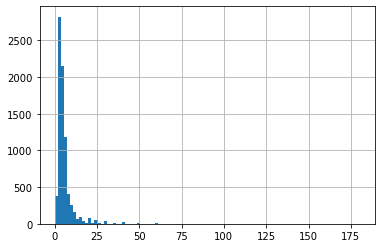

In [7]:
df_contracts.annual_salary.hist(bins=100)

<AxesSubplot:xlabel='annual_salary'>

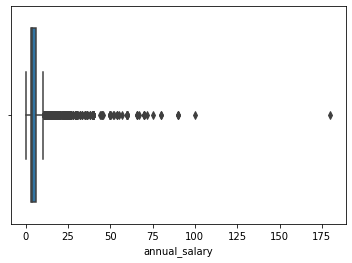

In [12]:
# or, put it in another way with a box plot
sns.boxplot(x=df_contracts.annual_salary)

In [13]:
df_contracts.annual_salary.describe()

count    7870.000000
mean        5.916921
std         6.985214
min         0.166667
25%         3.000000
50%         4.000000
75%         6.000000
max       180.000000
Name: annual_salary, dtype: float64

In [15]:
# let us take a look at this maximum value

df_contracts[df_contracts.annual_salary > 150][['page_title', 'annual_salary', 
       'profession_code_strict', 'startY', 'length', 'has_fled',
       'm_gender', 'a_age', 'a_gender',
       'female_guarantor', 'incremental_salary']].head()

,page_title,annual_salary,profession_code_strict,startY,length,has_fled,m_gender,a_age,a_gender,female_guarantor,incremental_salary
1136,Menego Gal (spechier) 1656-12-14,180.0,spechier,1656.0,0.166667,0,1.0,NaN,1.0,0,0


<AxesSubplot:>

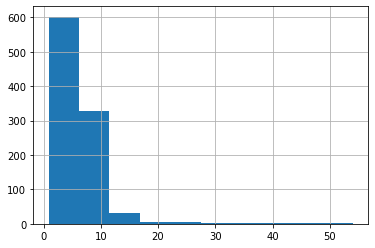

In [18]:
# what is the salary distribution for 'spechieri' (mirror-makers)?

df_contracts[(df_contracts.profession_code_strict == "spechier") & (df_contracts.annual_salary < 150)]["annual_salary"].hist()

<AxesSubplot:>

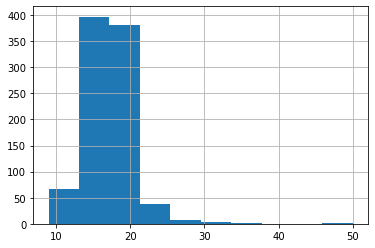

In [19]:
# what is the age distribution for 'spechieri' (mirror-makers)?

df_contracts[(df_contracts.profession_code_strict == "spechier") & (df_contracts.annual_salary < 150)]["a_age"].hist()

<AxesSubplot:>

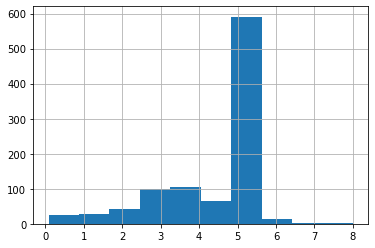

In [20]:
# what is the contract length distribution for 'spechieri' (mirror-makers)?

df_contracts[(df_contracts.profession_code_strict == "spechier") & (df_contracts.annual_salary < 150)]["length"].hist()

What to make of all this? Not sure. It might be a data entry error, but the contract looks suspicious: there is no age for the apprentice, and there is a very short contract duration (2 months). Probably, in this case, we should go back to check the documents in the archives.

### Quiz

Repeat the same check using another variable, e.g., age or contract length, and explore an outlier you found there.

## Effect of sampling

Pandas easly allows you to sample from a dataframe, let us see what the effects might be.

In [99]:
print("The number of contracts we have:", df_contracts.shape[0])
sample_size = 1000

The number of contracts we have: 9653


In [100]:
def show_effect_sample(sample_size):
    df = df_contracts.sample(n=sample_size, random_state=1)
    print("Basic statistics\n")
    print(df[["annual_salary","a_age","length"]].describe())
    print(df_contracts[["annual_salary","a_age","length"]].describe())
    print('\n======\n')
    fig1, ax = plt.subplots(1,2)
    sns.histplot(df["annual_salary"], ax=ax[0])
    sns.histplot(df_contracts["annual_salary"], ax=ax[1])
    ax[0].set_title("Salary - SAMPLE")
    ax[1].set_title("Salary - FULL")
    plt.show()
    fig1, ax = plt.subplots(1,2)
    sns.histplot(df["a_age"], ax=ax[0])
    sns.histplot(df_contracts["a_age"], ax=ax[1])
    ax[0].set_title("Age - SAMPLE")
    ax[1].set_title("Age - FULL")
    plt.show()
    fig1, ax = plt.subplots(1,2)
    sns.histplot(df["length"], ax=ax[0])
    sns.histplot(df_contracts["length"], ax=ax[1])
    ax[0].set_title("Length - SAMPLE")
    ax[1].set_title("Length - FULL")
    plt.show()
    fig1, ax = plt.subplots(1,2)
    sns.scatterplot(x=df.length, y=df.a_age, ax=ax[0])
    sns.scatterplot(x=df_contracts.length, y=df_contracts.a_age, ax=ax[1])
    ax[0].set_title("Length - SAMPLE")
    ax[1].set_title("Length - FULL")
    plt.show()

Basic statistics

       annual_salary       a_age      length
count     818.000000  960.000000  999.000000
mean        5.659981   14.228125    4.970554
std         5.725806    2.696122    1.478522
min         0.600000    6.000000    0.333333
25%         3.000000   12.000000    4.000000
50%         4.166667   14.000000    5.000000
75%         6.000000   16.000000    6.000000
max        70.000000   30.000000   11.000000
       annual_salary        a_age       length
count    7870.000000  9303.000000  9645.000000
mean        5.916921    14.266688     5.005694
std         6.985214     2.902770     1.462343
min         0.166667     1.000000     0.083333
25%         3.000000    12.000000     4.000000
50%         4.000000    14.000000     5.000000
75%         6.000000    16.000000     6.000000
max       180.000000    50.000000    15.000000




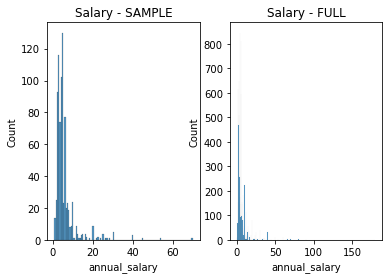

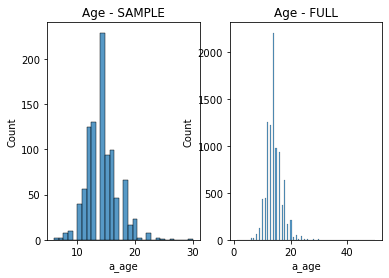

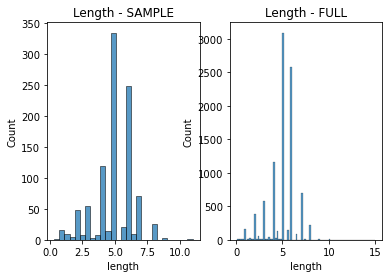

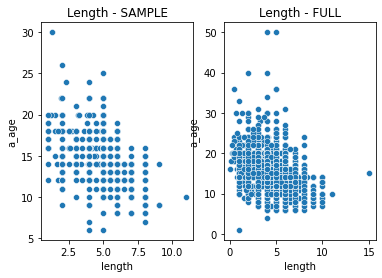

In [101]:
show_effect_sample(sample_size)

### Quiz

Try to modify this code to consider more variables and play with different sample sizes.

---